<a href="https://colab.research.google.com/github/Jacksonc2630/GC_NumDetection/blob/main/numdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
x,y = fetch_openml('mnist_784', version = 1, return_X_y = True)
print(pd.Series(y.value_counts()))
classes = ['0','1','2','3','4','5','6','7','8','9']
nclasses = len(classes)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.
   0. 

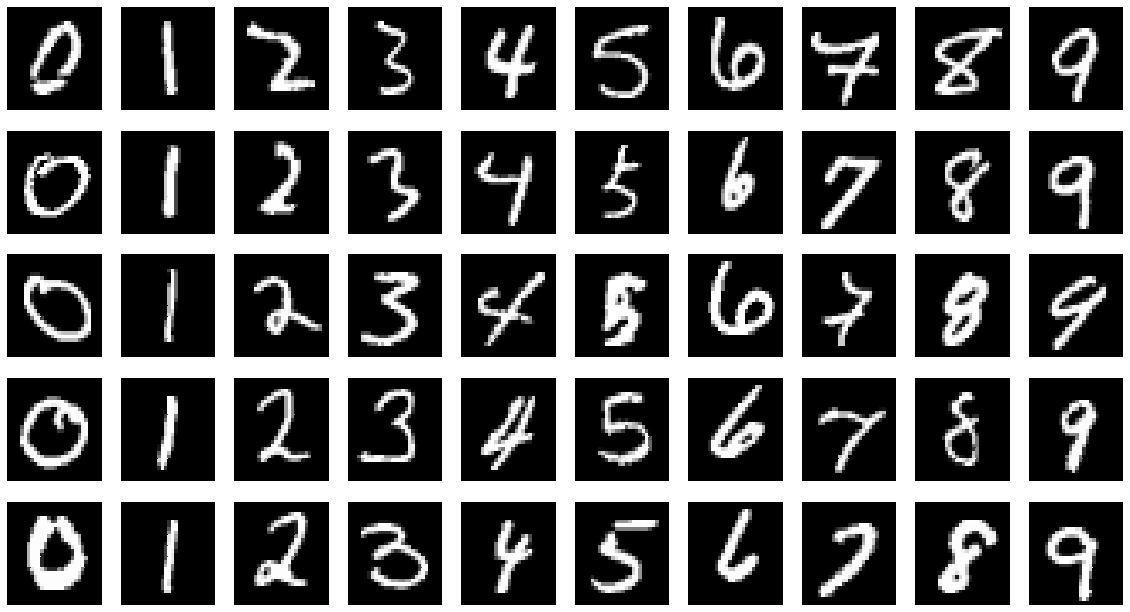

In [ ]:
samples_class = 5
figure = plt.figure(figsize = (nclasses*2,(1+samples_class*2)))
idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y==cls)
  idxs = np.random.choice(idxs,samples_class,replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i*nclasses+idx_cls+1
    P = plt.subplot(samples_class, nclasses, plt_idx)
    p = sns.heatmap(np.array(x.loc[idx]).reshape(28,28), cmap=plt.cm.gray, xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off')
    i += 1
  idx_cls += 1
idxs = np.flatnonzero(y == '0')
print(np.array(x.loc[idxs[0]]))

In [ ]:
print(len(x))
print(len(x.loc[0]))

70000
784


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 7500, test_size= 2500, random_state = 9)
x_train_scale = x_train/255.0
x_test_scale = x_test/255.0

In [ ]:
clf = LogisticRegression(solver = 'saga', multi_class='multinomial').fit(x_train_scale,y_train)
y_pred = clf.predict(x_test_scale)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9004


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


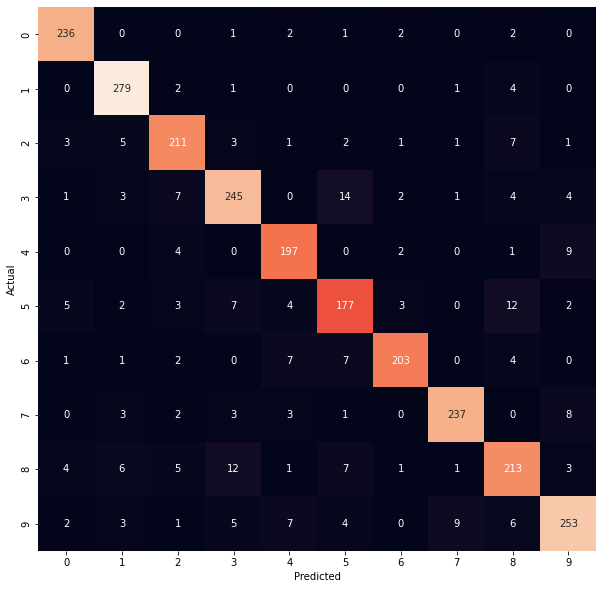

In [ ]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)